# Clustering And PCA Assignment

Our main task is to cluster the countries by the factors mentioned and then present our solution and recommendations to the CEO using a PPT. We are also supposed to use dimensionality reduction using PCA to get the visualisations of the clusters in a 2-D form. 

### Importing Packages

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Improting the PCA module
from sklearn.decomposition import PCA

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
country_data = pd.read_csv("Country-data.csv")

### Reading and Inspection

In [4]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Outlier Treatment

In [7]:
# Exports
Q1 = country_data['exports'].quantile(0.25)
Q3 = country_data['exports'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['exports'] >= Q1 - 1.5*IQR) & (country_data['exports'] <= Q3 + 1.5*IQR)]

# Child Mort
Q1 = country_data['child_mort'].quantile(0.25)
Q3 = country_data['child_mort'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['child_mort'] >= Q1 - 1.5*IQR) & (country_data['child_mort'] <= Q3 + 1.5*IQR)]

# Health
Q1 = country_data['health'].quantile(0.25)
Q3 = country_data['health'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['health'] >= Q1 - 1.5*IQR) & (country_data['health'] <= Q3 + 1.5*IQR)]

# Imports
Q1 = country_data['imports'].quantile(0.25)
Q3 = country_data['imports'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['imports'] >= Q1 - 1.5*IQR) & (country_data['imports'] <= Q3 + 1.5*IQR)]

# GDPP
Q1 = country_data['gdpp'].quantile(0.25)
Q3 = country_data['gdpp'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['gdpp'] >= Q1 - 1.5*IQR) & (country_data['gdpp'] <= Q3 + 1.5*IQR)]

# Inflation
Q1 = country_data['inflation'].quantile(0.25)
Q3 = country_data['inflation'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['inflation'] >= Q1 - 1.5*IQR) & (country_data['inflation'] <= Q3 + 1.5*IQR)]

# Income
Q1 = country_data['income'].quantile(0.25)
Q3 = country_data['income'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['income'] >= Q1 - 1.5*IQR) & (country_data['income'] <= Q3 + 1.5*IQR)]

# Life expec
Q1 = country_data['life_expec'].quantile(0.25)
Q3 = country_data['life_expec'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['life_expec'] >= Q1 - 1.5*IQR) & (country_data['life_expec'] <= Q3 + 1.5*IQR)]

# Total fer
Q1 = country_data['total_fer'].quantile(0.25)
Q3 = country_data['total_fer'].quantile(0.75)
IQR = Q3 - Q1
country_data = country_data[(country_data['total_fer'] >= Q1 - 1.5*IQR) & (country_data['total_fer'] <= Q3 + 1.5*IQR)]

In [8]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,40.835156,36.844523,6.397578,45.210671,10404.257812,7.446836,69.410156,3.106016,6127.343750
std,35.122072,19.166882,2.201190,17.839605,8661.998540,6.476804,7.449746,1.552976,6925.070115
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,13.650000,22.775000,4.967500,31.200000,2910.000000,2.255000,63.600000,1.795000,1272.500000
50%,25.800000,32.800000,6.020000,44.100000,8215.000000,5.805000,70.800000,2.600000,3625.000000
75%,62.925000,50.200000,7.882500,58.225000,15525.000000,10.950000,75.575000,4.405000,8207.500000
max,137.000000,86.900000,11.800000,92.600000,33900.000000,26.500000,81.900000,7.490000,30800.000000


### Feature Standardisation

In [9]:
#Removing Country from data
std_country_data = country_data.drop("country",axis=1)
std_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
std_country_data=(std_country_data-std_country_data.mean())/std_country_data.std()
std_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.405522,-1.400568,0.537174,-0.017415,-1.015269,0.307739,-1.773236,1.747602,-0.804951
1,-0.690026,-0.461448,0.069245,0.189989,-0.054752,-0.456527,0.924843,-0.937565,-0.294198
2,-0.385375,0.081154,-1.011988,-0.774158,0.288125,1.336024,0.951689,-0.139098,-0.240769
3,2.225519,1.328097,-1.611664,-0.129525,-0.520002,2.308726,-1.249728,1.966536,-0.375064
4,-0.869401,0.451585,-0.166991,0.767356,1.003896,-0.927438,0.991959,-0.628481,0.876909


### Checking the Correlation Between features

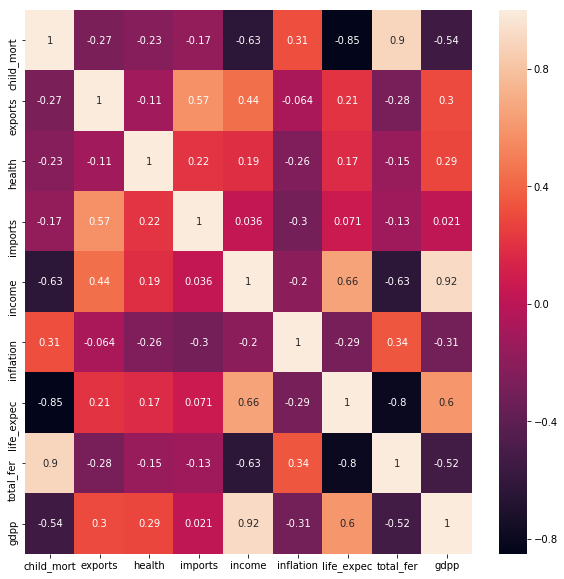

In [11]:
plt.figure(figsize = (10,10))       
sns.heatmap(std_country_data.corr(),annot = True)

### PCA on the data

In [12]:
pca = PCA(svd_solver='randomized', random_state=42)

In [13]:
#Doing the PCA on the data
pca.fit(std_country_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-0.43161108,  0.21442328,  0.14974651,  0.12410657,  0.41661454,
        -0.21682521,  0.4204011 , -0.42253783,  0.39249449],
       [-0.09565962, -0.56202708, -0.04224377, -0.74903889,  0.11042981,
         0.19220233,  0.18398688, -0.10201277,  0.13688228],
       [ 0.00173987,  0.45255331, -0.68996329, -0.11954804,  0.20485286,
         0.50843382,  0.03119363, -0.04407131,  0.03829411],
       [ 0.33190723,  0.15327746,  0.40759422, -0.07731359,  0.41691255,
         0.23863498, -0.25488132,  0.37036976,  0.5112066 ],
       [-0.25304986,  0.00489365,  0.47920656,  0.17709922, -0.13293797,
         0.74168141,  0.14217569, -0.13223655, -0.26358018],
       [-0.07348316,  0.4157915 ,  0.24687113, -0.46472958,  0.01064667,
        -0.1353538 , -0.53011816, -0.43331793, -0.23994796],
       [ 0.13619759,  0.45923708,  0.2013838 , -0.37808404, -0.15718516,
        -0.14983889,  0.59714017,  0.36974005, -0.21588328],
       [-0.776751  ,  0.06665621, -0.04966433, -0.09457661, -0

#### Looking at the screeplot to assess the number of needed principal components

In [15]:
pca.explained_variance_ratio_

array([0.4696844 , 0.16157921, 0.13475771, 0.09874537, 0.07571045,
       0.02559704, 0.01884138, 0.00978787, 0.00529655])

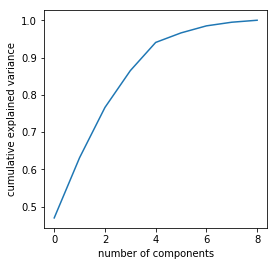

In [16]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see 4 components are enough to show 95% variance

In [17]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [18]:
df_pca = pca_final.fit_transform(std_country_data)
df_pca.shape

(128, 4)

### Checking correlation 

In [19]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

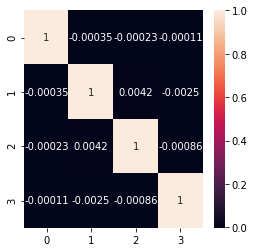

In [20]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (4,4))
sns.heatmap(corrmat,annot = True)

We can see no correlation between features

In [21]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.004219235954314818 , min corr:  -0.002475462210726548


There is no correlation between any two components

## K-Means For Clusters

In [22]:
# Kmeans with K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=30)
model_clus4.fit(std_country_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=30,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Silhouette Analysis

In [23]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k).fit(std_country_data)
    sse_.append([k, silhouette_score(std_country_data, kmeans.labels_)])

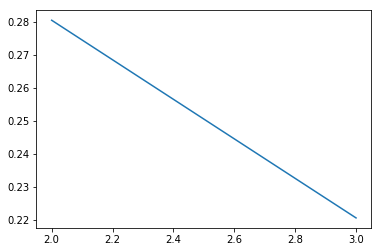

In [24]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

## Sum of Squared Distances

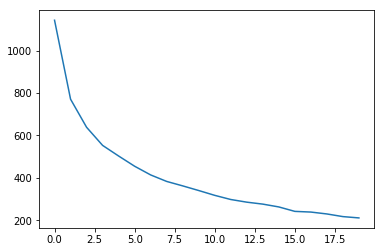

In [25]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(std_country_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [26]:
# analysis of clusters formed
country_data.index = pd.RangeIndex(len(country_data.index))
km_data = pd.concat([country_data, pd.Series(model_clus4.labels_)], axis=1)
km_data.columns = ['country','child_mort','exports','health','imports',
                           'income','inflation','life_expec','total_fer','gdpp', 'ClusterID']
km_child_mort = 	pd.DataFrame(km_data.groupby(["ClusterID"]).child_mort.mean())
km_exports = 	pd.DataFrame(km_data.groupby(["ClusterID"]).exports.mean())
km_health = 	pd.DataFrame(km_data.groupby(["ClusterID"]).health.mean())
km_imports = 	pd.DataFrame(km_data.groupby(["ClusterID"]).imports.mean())
km_income = 	pd.DataFrame(km_data.groupby(["ClusterID"]).income.mean())
km_inflation = 	pd.DataFrame(km_data.groupby(["ClusterID"]).inflation.mean())
km_life_expec = 	pd.DataFrame(km_data.groupby(["ClusterID"]).life_expec.mean())
km_total_fer = 	pd.DataFrame(km_data.groupby(["ClusterID"]).total_fer.mean())
km_gdpp = 	pd.DataFrame(km_data.groupby(["ClusterID"]).gdpp.mean())

In [27]:
df = pd.concat([pd.Series([0,1,2,3]), km_child_mort, km_exports, km_health, km_imports,km_income, km_inflation, km_life_expec,
                km_total_fer, km_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean",
              "life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,88.164865,27.635405,6.097838,42.372973,3039.864865,10.437703,60.897297,5.181351,1435.567568
1,1,6.850000,49.780000,7.674000,50.375000,24855.000000,1.956550,77.395000,1.664000,19085.000000
2,2,22.482051,46.666667,6.612821,59.861538,9398.974359,4.856128,71.466667,2.398462,4550.153846
3,3,29.718750,27.437156,5.684063,27.408309,11112.812500,10.577500,71.756250,2.470000,5375.875000


We will pick the cluster with high child_mort_mean, low income_mean, low gdpp_mean.

In [28]:
# Getting Countries
km_country = km_data.loc[km_data.ClusterID == 2,['country']]
km_country.head()

,country
1,Albania
11,Belarus
12,Belize
14,Bhutan
16,Bosnia and Herzegovina


## Heirarchical Clustering

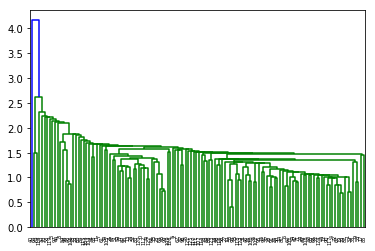

In [29]:
# heirarchical clustering
mergings = linkage(std_country_data, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

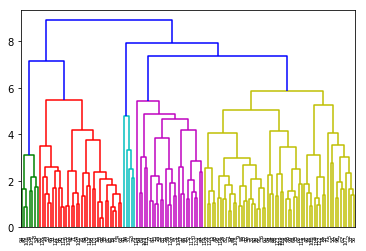

In [30]:
mergings = linkage(std_country_data, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [31]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
hc_data = pd.concat([country_data, clusterCut], axis=1)
hc_data.columns = ['country','child_mort','exports','health','imports',
                           'income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

#summarise
hc_child_mort = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).child_mort.mean())
hc_exports = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).exports.mean())
hc_health = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).health.mean())
hc_imports = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).imports.mean())
hc_income = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).income.mean())
hc_inflation = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp = 	pd.DataFrame(hc_data.groupby(["ClusterID"]).gdpp.mean())

In [32]:
df = pd.concat([pd.Series([0,1,2,3]), hc_child_mort, hc_exports, hc_health, hc_imports,hc_income, hc_inflation, hc_life_expec,
                hc_total_fer, hc_gdpp], axis=1)
df.columns = ["ClusterID", "child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean",
              "life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,88.069231,26.104615,7.415385,44.507692,2736.346154,8.332115,58.542308,5.175385,1490.576923
1,1,34.406897,29.211707,5.631207,36.701136,8775.172414,8.476741,70.903448,2.847931,4235.431034
2,2,91.000000,68.320000,3.540000,47.320000,12702.000000,20.700000,62.500000,5.076000,6664.000000
3,3,12.474359,51.320513,7.225128,58.064103,17644.358974,3.625872,75.320513,1.857692,11963.333333


In [33]:
# Getting Countries
hc_country = hc_data.loc[hc_data.ClusterID == 0,['country']]
hc_country.head()

,country
0,Afghanistan
13,Benin
17,Botswana
20,Burkina Faso
21,Burundi


In [34]:
#Common Countries
c_country = set.intersection(set(km_country.country), set(hc_country.country))

In [35]:
c_country

{'Botswana', 'Namibia', 'Solomon Islands'}

## We can consider these countries for help